In [57]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [58]:
def sieve(n):
    """Implementation of the sieve of Eratosthenes utilizing NumPy arrays"""
    # prepare array of primes with first two positions as False
    primes = np.ones(n, dtype=np.bool_)
    primes[:2] = False

    # loop over primes and mark composite numbers
    for p in range(2, int(n ** 0.5) + 1):
        if primes[p]:
            primes[p * p: n : p] = False

    return primes.nonzero()[0]

# if file ./data/primes_2**32.csv does not exist, generate it
if not os.path.exists("./data/primes_2**32.csv"):
    print("generating primes for testing")
    test = sieve(2**32)

    # save to csv file
    print("saving primes")
    np.savetxt("./data/primes_2**32.csv", test, delimiter=",", fmt="%d")
    print("done")
else:
    print("test file already exists")

test file already exists


In [59]:
# print hardware information
print("hardware information:")
# print(f'CPU:\n{os.popen("lscpu | grep name").read().split(":")[1].strip()}\n')
print('CPU:')
print(os.popen("lscpu | grep name").read().split(":")[1].strip())
print('GPU:')
!lspci | grep -i 'NVIDIA' | awk -F': ' '{print $2}'

hardware information:
CPU:
AMD Ryzen 7 5800H with Radeon Graphics
GPU:
NVIDIA Corporation GA107M [GeForce RTX 3050 Mobile] (rev a1)


In [60]:
# run benchmark
!g++ -lgmp -o benchmark.out benchmark.cpp -L./.. -lmiller_rabin -Wl,-rpath,./..
!./benchmark.out
!rm benchmark.out

GMP version: 6.2.1
loading test data...
about to test 203280221 primes on a GPU
warmup...
warmup done
Time taken: 24.294 seconds
about to test 203280221 primes on a CPU
Time taken: 1.689 seconds1 (0.442739%))


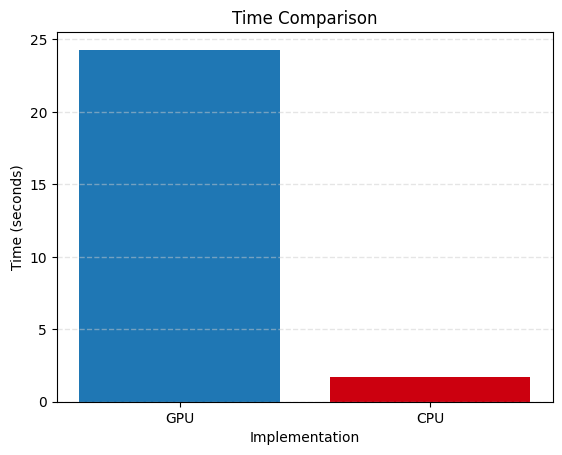

In [61]:
# load log and display bar chart
df = pd.read_csv('./data/log.csv')
display(df)

df.sort_values(by='time', ascending=False, inplace=True)
# Extract the data columns
implementations = df['implementation']
times = df['time']

# Configure plot
# plt.figure(figsize=(12, 8))
# plt.yticks(range(0, 80, 5))
plt.grid(axis='y', which='major', color='#CCCCCC', linestyle='--', linewidth=1, alpha=0.5)

# Set the labels and title
plt.xlabel('Implementation')
plt.ylabel('Time (seconds)')
plt.title('Time Comparison')



# Add the data to the plot
plt.bar(implementations, times)

# fill cpu with red
plt.bar(implementations[1], times[1], color='#CC000F')

# export to svg
plt.savefig('./data/results.svg', format='svg', dpi=1200)
# # save to png
# plt.savefig('results.png', format='png', dpi=600)

plt.show()